In [3]:
import galarp as grp
grp.pyplot_style()
cmap = grp.lavender_cmap(step_1=50)

import numpy as np

from astropy import units as u

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from gala.units import galactic

from gala import potential as gp

from scipy import stats

In [2]:
test = gp.MilkyWayPotential()
print(test.parameters)

for key in test.parameters.keys():
    print(key, test.parameters[key], test[key])


{'disk': {'m': <Quantity 6.8e+10 solMass>, 'a': <Quantity 3. kpc>, 'b': <Quantity 0.28 kpc>}, 'bulge': {'m': <Quantity 5.e+09 solMass>, 'c': <Quantity 1. kpc>}, 'nucleus': {'m': <Quantity 1.71e+09 solMass>, 'c': <Quantity 0.07 kpc>}, 'halo': {'m': <Quantity 5.4e+11 solMass>, 'r_s': <Quantity 15.62 kpc>, 'a': <Quantity 1.>, 'b': <Quantity 1.>, 'c': <Quantity 1.>}}
disk {'m': <Quantity 6.8e+10 solMass>, 'a': <Quantity 3. kpc>, 'b': <Quantity 0.28 kpc>} MiyamotoNagaiPotential
bulge {'m': <Quantity 5.e+09 solMass>, 'c': <Quantity 1. kpc>} HernquistPotential
nucleus {'m': <Quantity 1.71e+09 solMass>, 'c': <Quantity 0.07 kpc>} HernquistPotential
halo {'m': <Quantity 5.4e+11 solMass>, 'r_s': <Quantity 15.62 kpc>, 'a': <Quantity 1.>, 'b': <Quantity 1.>, 'c': <Quantity 1.>} NFWPotential


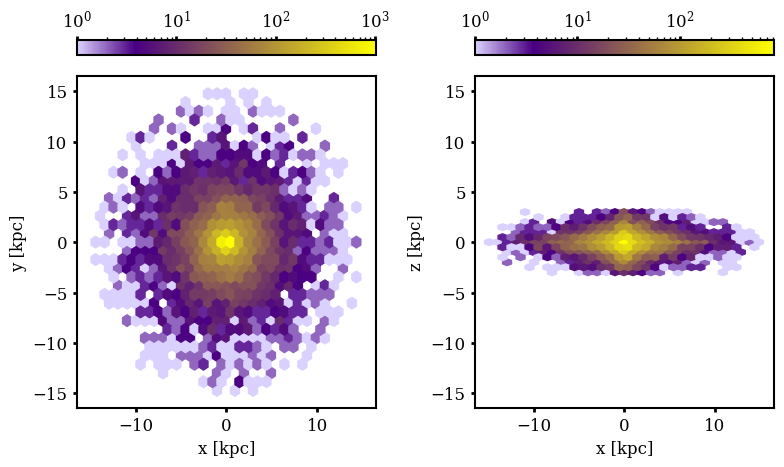

In [3]:
jz2023_satellite = grp.builtins.JZ2023_Satellite()
mass_profile = grp.gen_mass_profile(jz2023_satellite)

particles = grp.ExponentialGrid(h_R=jz2023_satellite["gas"].parameters["a"],
                                h_z=jz2023_satellite["gas"].parameters["b"],
                                n_particles=10000)

particles.generate(mass_profile=mass_profile, positions="temp/positions.npy")

particles.plot_density(cmap=cmap, gridsize=30)

# particles = grp.UniformGrid(n_particles=50)
# particles.generate(mass_profile=mass_profile)

In [4]:
incs = np.linspace(10, 90, 15).astype(int)
# incs = [45]

stripped_fractions = []

for inc in incs:
    wind = grp.LorentzianWind(t0=1000 * u.Myr, width=500 * u.Myr, units=galactic)
    wind.init_from_inc(inclination=np.deg2rad(inc), strength= 1400 * u.km/u.s)

    shadow = grp.UniformLinearZVariableShadow(damping=0.4, R_disk=3*jz2023_satellite["gas"].parameters["a"].value,
                            zmin=0.5, z_dropoff=40,
                            dynamic=True, debug=True)
    shadow.init_from_wind(wind)


    sim = grp.RPSim(wind=wind, potential=jz2023_satellite, shadow=shadow)
    orbits = sim.run(particles, rho_icm=1e-27 * u.g/u.cm**3, integration_time=2000 * u.Myr, dt=5*u.Myr, printout=False)

    stripped_fractions.append(grp.stripped(orbits))

    # grp.density_matrix(orbits, xextent=20, yextent=20, outname=f"figures/dm/density_xy_matrix_{inc}.png", 
    #                    cmap=cmap, vmax=200,
    #                    cbar_loc="lower right")

    # grp.animated_hexbin_plot(orbits, outname=f"figures/animated/animated_hexbin_{inc}.gif", 
    #                          n_frames=200, cmap=cmap, xextent=50, 
    #                          vextent=(-100, 200))



100%|██████████| 399/399 [00:09<00:00, 41.18it/s]


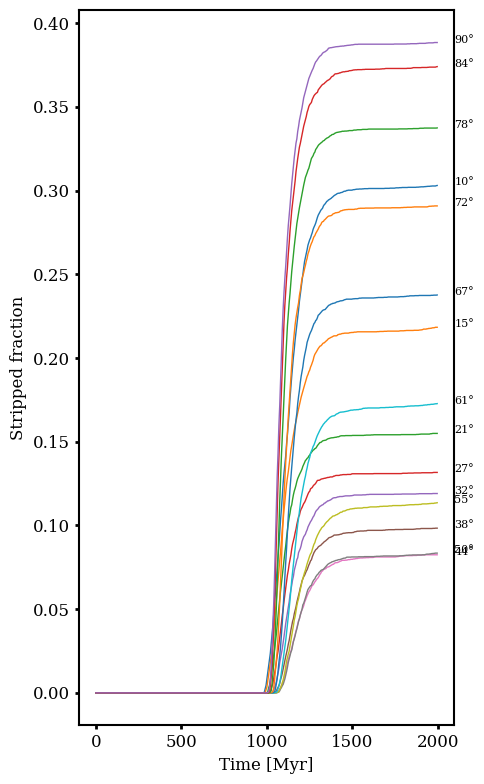

In [5]:

fig = plt.figure(figsize=(5, 8))


for inc, stripped_fraction in zip(incs, stripped_fractions):

    plt.plot(orbits.data.t, stripped_fraction, label=f"{inc}°")
    plt.text(np.max(orbits.data.t).value * 1.05, stripped_fraction[-1], f"{inc}°", fontsize=8)

plt.xlabel("Time [Myr]")
plt.ylabel("Stripped fraction")
#plt.legend()
plt.tight_layout()
plt.show()

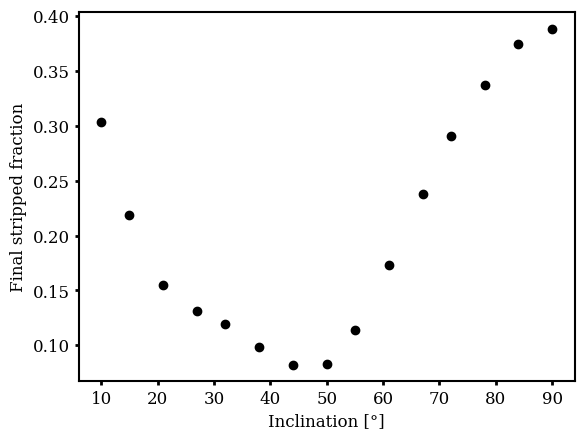

In [6]:
plt.scatter(incs, [s[-1] for s in stripped_fractions], c="k")
plt.xlabel("Inclination [°]")
plt.ylabel("Final stripped fraction")
plt.show()

In [7]:
import matplotlib.colors as colors

color_map1 = ['#4477AA', '#66CCEE', '#228833', '#CCBB44', '#EE6677', '#AA3377', '#BBBBBB']
color_map = colors.ListedColormap(color_map1) 


In [ ]:
incs = np.linspace(10, 90, 15).astype(int)
# incs = [45]

stripped_fractions = []


for inc in incs:
    wind = grp.LorentzianWind(t0=1000 * u.Myr, width=500 * u.Myr, units=galactic)
    wind.init_from_inc(inclination=np.deg2rad(inc), strength= 1400 * u.km/u.s)

    shadow = grp.UniformLinearZVariableShadow(damping=0.4, R_disk=3*jz2023_satellite["gas"].parameters["a"].value,
                            zmin=0.5, z_dropoff=40,
                            dynamic=True, debug=True)
    shadow.init_from_wind(wind)


    sim = grp.RPSim(wind=wind, potential=jz2023_satellite, shadow=None)
    orbits = sim.run(particles, rho_icm=1e-27 * u.g/u.cm**3, integration_time=4000 * u.Myr, dt=10*u.Myr, printout=False)


    stripped_fractions.append(grp.stripped(orbits))

    grp.animated_hexbin_plot(orbits, outname=f"figures/animated_noshadow/animated_hexbin_{inc}.gif", 
                            n_frames=200, cmap=cmap, xextent=150, yextent=150,
                            vextent=(-100, 200))


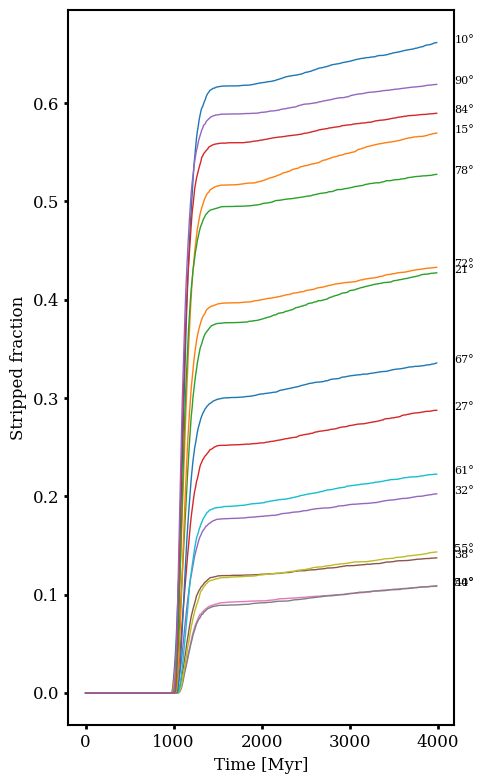

In [9]:

fig = plt.figure(figsize=(5, 8))


for inc, stripped_fraction in zip(incs, stripped_fractions):

    plt.plot(orbits.data.t, stripped_fraction, label=f"{inc}°")
    plt.text(np.max(orbits.data.t).value * 1.05, stripped_fraction[-1], f"{inc}°", fontsize=8)

plt.xlabel("Time [Myr]")
plt.ylabel("Stripped fraction")
#plt.legend()
plt.tight_layout()
plt.show()



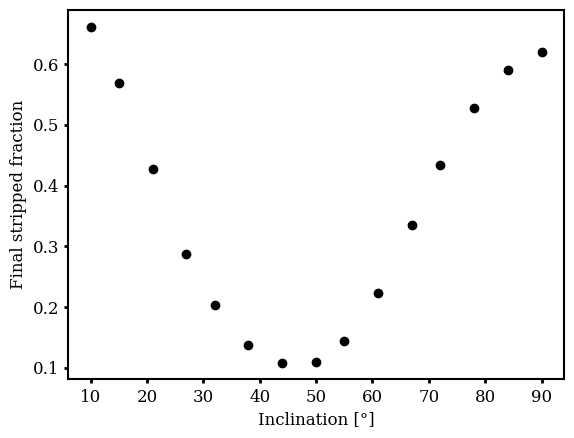

In [10]:
plt.scatter(incs, [s[-1] for s in stripped_fractions], c="k")
plt.xlabel("Inclination [°]")
plt.ylabel("Final stripped fraction")
plt.show()

In [15]:

def RB2006_Satellite():
    """ Satellite potential for Roediger & Brüggen 2006
        See https://academic.oup.com/mnras/article/369/2/567/3101476
    """

    dm = gp.BurkertPotential.from_r0(23 * u.kpc, units=galactic)

    stars = gp.MiyamotoNagaiPotential(m=1e11 * u.Msun, a=4 * u.kpc, b=0.25 * u.kpc, units=galactic)
    bulge = gp.HernquistPotential(m=1e10 * u.Msun, c=0.4 * u.kpc, units=galactic)
    
    gas = gp.MiyamotoNagaiPotential(m=10**10 * u.Msun, a=7 * u.kpc, b=0.4 * u.kpc, units=galactic)

    return gp.CompositePotential(dm=dm, stars=stars, bulge=bulge, gas=gas)



rb2006_satellite = RB2006_Satellite()


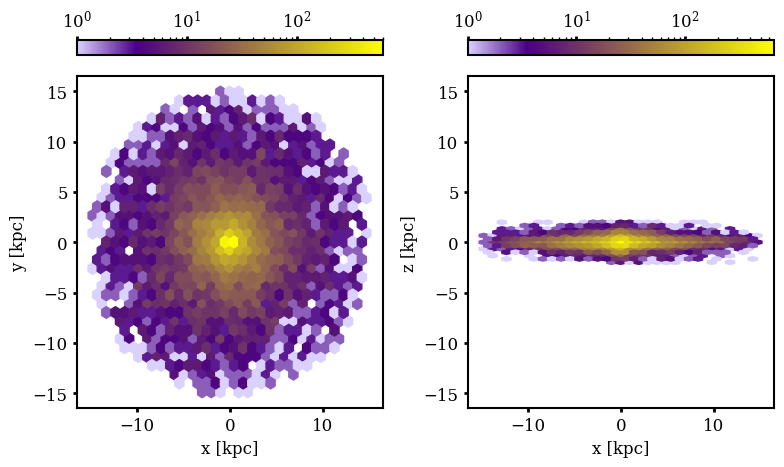

In [20]:
mass_profile = grp.gen_mass_profile(rb2006_satellite)

# positions = grp.generate_exponential_positions(10000, 
#                                                h_R = rb2006_satellite["gas"].parameters["a"], 
#                                                h_z = rb2006_satellite["gas"].parameters["b"],
#                                                outname="temp/positions_RB.npy")

particles = grp.ExponentialGrid(h_R=rb2006_satellite["gas"].parameters["a"],
                                h_z=rb2006_satellite["gas"].parameters["b"],
                                n_particles=10000)

particles.generate(mass_profile=mass_profile, positions="temp/positions_RB.npy")

particles.plot_density(cmap=cmap, gridsize=30)

100%|██████████| 399/399 [00:08<00:00, 46.79it/s]
MovieWriter ffmpeg unavailable; using Pillow instead.


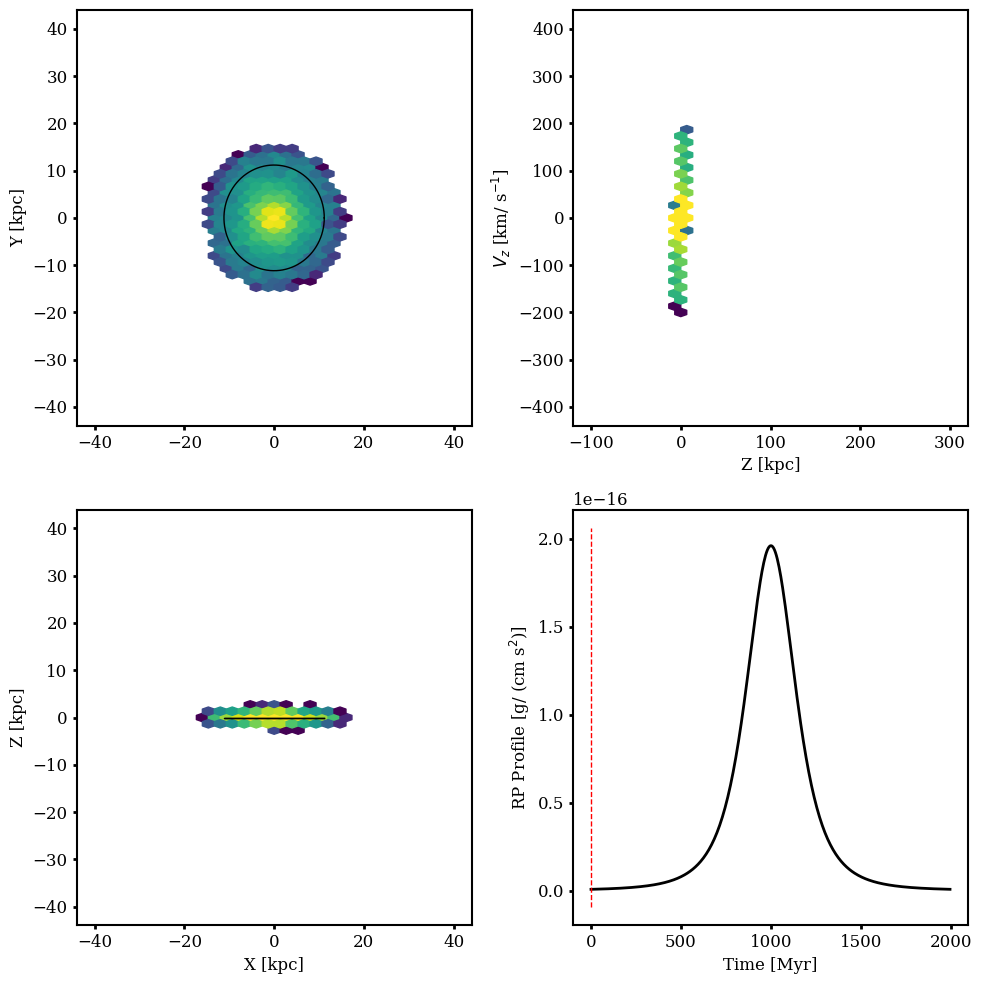

In [27]:
inc = 45

wind = grp.LorentzianWind(t0=1000 * u.Myr, width=500 * u.Myr, units=galactic)
wind.init_from_inc(inclination=np.deg2rad(inc), strength= 1400 * u.km/u.s)

sim = grp.RPSim(wind=wind, potential=rb2006_satellite, shadow=None, rho_icm=1e-32 * u.g/u.cm**3)
orbits = sim.run(particles, rho_icm=1e-32 * u.g/u.cm**3, integration_time=2000 * u.Myr, dt=5*u.Myr, printout=False)

grp.animated_hexbin_plot(orbits, outname=f"figures/animated/RB_static.gif")

In [ ]:
print(p)